# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [3]:
df = pd.read_csv("cement_slump.csv")
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820
...,...,...,...,...,...,...,...,...,...,...
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000,49.970
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000,50.230
100,258.800,88.000,239.600,175.300,7.600,938.900,646.000,0.000,20.000,50.500
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000,49.170


# EDA and Graphical analysis

In [4]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [6]:
df.isnull().any()

Cement                                False
Slag                                  False
Fly ash                               False
Water                                 False
SP                                    False
Coarse Aggr.                          False
Fine Aggr.                            False
SLUMP(cm)                             False
FLOW(cm)                              False
Compressive Strength (28-day)(Mpa)    False
dtype: bool

# Data Preprocessing 

### Features and target variable

In [7]:
X = df.drop(columns="Compressive Strength (28-day)(Mpa)",axis=1)
y = df["Compressive Strength (28-day)(Mpa)"]

In [8]:
X.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000


In [9]:
X.shape

(103, 9)

In [10]:
y.head()

0   34.990
1   41.140
2   41.810
3   42.080
4   26.820
Name: Compressive Strength (28-day)(Mpa), dtype: float64

In [11]:
y.shape

(103,)

### Splitting data into training and testing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

## Scaling

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Robustscaler is used when outlier could be present

scaler = StandardScaler()

In [15]:
scaler.fit(X_train)  # Apply just for X_tarin not for X_test (Kalıp çıkarma)

StandardScaler()

In [16]:
X_train_scaled = scaler.transform(X_train) # Apply transform according to fit
X_train_scaled

array([[-1.01867817e+00,  4.89060387e-01, -7.01085388e-02,
        -1.99267756e-01, -5.39878038e-01, -1.37532719e+00,
         2.52572977e+00,  6.48505379e-01,  4.82444362e-01],
       [ 8.52113706e-01, -6.26114653e-01,  1.06779252e+00,
        -1.50862633e-01, -3.67117066e-01,  2.75612237e-01,
        -1.40263561e+00,  1.08244950e+00,  9.92185022e-01],
       [-8.80658652e-01,  1.86460669e+00, -1.63768284e+00,
         5.26809088e-01,  1.18773168e+00, -7.54320879e-01,
         1.20685410e+00,  5.61716555e-01,  2.93415534e-02],
       [ 8.63406212e-01,  4.56309284e-01, -9.26635646e-02,
         1.87973228e-01, -8.85399982e-01, -8.64461622e-02,
        -1.35239273e+00, -2.48312469e-01, -1.32996687e+00],
       [ 4.49347647e-01,  1.12422708e-01, -3.85878901e-01,
        -1.02457510e-01, -8.85399982e-01, -6.13715675e-01,
         7.67228879e-01,  1.02459028e+00,  5.95720064e-01],
       [-1.03122540e+00,  1.61549362e-01, -3.40768849e-01,
         2.36378351e-01,  1.51165851e-01, -2.973539

In [17]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.15199248, -1.2958747 ,  0.21182928, -0.34448313, -1.23092193,
        -0.18018296,  0.51601447,  0.67743499,  0.59572006],
       [-0.79282805, -1.2958747 ,  1.29447053, -0.68331899,  1.53325363,
        -0.30907107,  1.34816221,  0.33027969,  0.25589296],
       [ 0.87595344,  0.45630928, -1.63768284,  0.62361933,  0.49668779,
        -0.05129486,  0.06068834,  0.79315342,  0.76563362],
       [ 0.72538669,  0.24342712, -0.27310377, -0.44129337,  0.15116585,
         0.21819845, -0.7086558 ,  0.79315342,  0.65235792],
       [-0.86811142,  1.09495578,  0.4824896 ,  0.28478347,  0.84220974,
        -0.66058408, -0.48884319, -0.59546776, -0.65031266],
       [-1.05631986,  1.60259787,  0.9223126 ,  0.57521421,  0.84220974,
        -1.5628008 , -0.41033868, -1.8105113 , -1.66979398],
       [-0.92582868,  0.70358011,  1.06892027, -0.83337487, -0.64353462,
         0.95403234, -1.39164498, -0.42189012, -0.45208018],
       [ 1.1143508 ,  0.76744476, -1.63768284,  0.62361933, -0

In [18]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [19]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


##  1. Model Building (Linear Regression)

In [20]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [21]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

### 1.1 Interpret the model

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

### 1.2 Model Evaluation

In [24]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") # Evaluate the result. Overfitting?
ls

,linear_train,linear_test
R2,0.900,0.921
mae,1.992,1.716
mse,6.237,4.439
rmse,2.497,2.107


In [25]:
from sklearn.model_selection import cross_validate

In [26]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [27]:
scores

{'fit_time': array([0.00298691, 0.00099897, 0.00099993, 0.00099945, 0.        ]),
 'score_time': array([0.00099993, 0.00199914, 0.00099993, 0.00099945, 0.00099969]),
 'test_r2': array([0.87036886, 0.71883703, 0.93480107, 0.88567151, 0.87970636]),
 'test_neg_mean_absolute_error': array([-2.26258085, -2.24094427, -1.56978316, -2.50999046, -2.34599774]),
 'test_neg_mean_squared_error': array([ -7.10315382,  -9.75375658,  -3.28352853, -10.98491871,
         -7.69547713]),
 'test_neg_root_mean_squared_error': array([-2.66517426, -3.12310048, -1.81205092, -3.31435042, -2.7740723 ])}

In [28]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.003,0.001,0.870,-2.263,-7.103,-2.665
2,0.001,0.002,0.719,-2.241,-9.754,-3.123
3,0.001,0.001,0.935,-1.570,-3.284,-1.812
4,0.001,0.001,0.886,-2.510,-10.985,-3.314
5,0.000,0.001,0.880,-2.346,-7.695,-2.774


In [29]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.858
test_neg_mean_absolute_error       -2.186
test_neg_mean_squared_error        -7.764
test_neg_root_mean_squared_error   -2.738
dtype: float64

In [30]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.900,0.921
mae,1.992,1.716
mse,6.237,4.439
rmse,2.497,2.107


# 2. Regularization

## 2.1 Ridge (Apply and evaluate)

In [31]:
from sklearn.linear_model import Ridge

In [32]:
ridge_model = Ridge(alpha=1, random_state=42)

In [35]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [34]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [36]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.899,0.922
mae,2.003,1.699
mse,6.313,4.398
rmse,2.513,2.097


In [37]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.900,0.921,0.899,0.922
mae,1.992,1.716,2.003,1.699
mse,6.237,4.439,6.313,4.398
rmse,2.497,2.107,2.513,2.097


In [38]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [39]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001,0.002,0.868,-2.265,-7.211,-2.685
2,0.001,0.001,0.735,-2.206,-9.186,-3.031
3,0.001,0.001,0.932,-1.636,-3.431,-1.852
4,0.001,0.001,0.884,-2.532,-11.117,-3.334
5,0.001,0.001,0.888,-2.392,-7.185,-2.680


In [40]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.861
test_neg_mean_absolute_error       -2.206
test_neg_mean_squared_error        -7.626
test_neg_root_mean_squared_error   -2.717
dtype: float64

In [41]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.899,0.922
mae,2.003,1.699
mse,6.313,4.398
rmse,2.513,2.097


<AxesSubplot:>

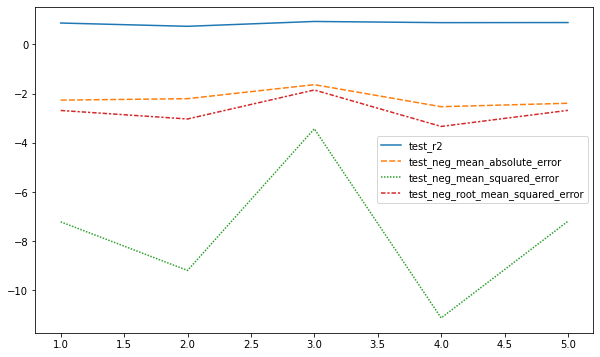

In [42]:
sns.lineplot(data = scores.iloc[:,2:])

In [43]:
ridge_model.coef_

array([ 4.8930977 , -1.53407954,  4.56389199, -3.94753322,  0.13909195,
       -4.08634982, -1.84857226, -2.18856693,  1.18471435])

In [44]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [45]:
from sklearn.linear_model import RidgeCV

In [46]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [47]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [49]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [50]:
ridge_cv_model.alpha_ #Ridge(alpha=0.02)

0.42000000000000004

In [51]:
#rmse for ridge with CV
ridge_cv_model.best_score_

-2.710336898759889

In [52]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [53]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.900,0.923
mae,1.999,1.694
mse,6.267,4.357
rmse,2.503,2.087


In [54]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.900,0.921,0.899,0.922,0.900,0.923
mae,1.992,1.716,2.003,1.699,1.999,1.694
mse,6.237,4.439,6.313,4.398,6.267,4.357
rmse,2.497,2.107,2.513,2.097,2.503,2.087


## 2.2 Lasso (Apply and evalute)

In [55]:
from sklearn.linear_model import Lasso, LassoCV

In [56]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [57]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [58]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.768,0.816
mae,3.016,2.588
mse,14.521,10.343
rmse,3.811,3.216


In [59]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.900,0.921,0.899,0.922,0.900,0.923,0.768,0.816
mae,1.992,1.716,2.003,1.699,1.999,1.694,3.016,2.588
mse,6.237,4.439,6.313,4.398,6.267,4.357,14.521,10.343
rmse,2.497,2.107,2.513,2.097,2.503,2.087,3.811,3.216


In [60]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [61]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [62]:
lasso_cv_model.alpha_

0.01

In [63]:
np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

(array([99], dtype=int64),)

In [64]:
alpha_space[::-1]

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [65]:
lasso_cv_model.mse_path_[99].mean()

7.686622513266696

In [66]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [67]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.900,0.923
mae,1.998,1.687
mse,6.259,4.346
rmse,2.502,2.085


In [68]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.900,0.921,0.899,0.922,0.900,0.923,0.768,0.816,0.900,0.923
mae,1.992,1.716,2.003,1.699,1.999,1.694,3.016,2.588,1.998,1.687
mse,6.237,4.439,6.313,4.398,6.267,4.357,14.521,10.343,6.259,4.346
rmse,2.497,2.107,2.513,2.097,2.503,2.087,3.811,3.216,2.502,2.085


In [69]:
lasso_cv_model.coef_

array([ 4.65222827, -1.85625152,  4.25869027, -4.36584994,  0.06133681,
       -4.61690871, -2.22567037, -2.30725482,  1.36182721])

## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [70]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [71]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) # l1_ratio: 1: Lasso or 0:Ridge
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [72]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [73]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.625,0.625
mae,3.870,3.724
mse,23.448,21.153
rmse,4.842,4.599


In [74]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.900,0.921,0.899,0.922,0.900,0.923,0.768,0.816,0.900,0.923,0.625,0.625
mae,1.992,1.716,2.003,1.699,1.999,1.694,3.016,2.588,1.998,1.687,3.870,3.724
mse,6.237,4.439,6.313,4.398,6.267,4.357,14.521,10.343,6.259,4.346,23.448,21.153
rmse,2.497,2.107,2.513,2.097,2.503,2.087,3.811,3.216,2.502,2.085,4.842,4.599


In [75]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [76]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [77]:
elastic_cv_model.alpha_

0.01

In [78]:
elastic_cv_model.l1_ratio_

0.1

In [79]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [80]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.899,0.923
mae,2.001,1.693
mse,6.287,4.367
rmse,2.507,2.090


In [81]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.900,0.921,0.899,0.922,0.900,0.923,0.768,0.816,0.900,0.923,0.625,0.625,0.899,0.923
mae,1.992,1.716,2.003,1.699,1.999,1.694,3.016,2.588,1.998,1.687,3.870,3.724,2.001,1.693
mse,6.237,4.439,6.313,4.398,6.267,4.357,14.521,10.343,6.259,4.346,23.448,21.153,6.287,4.367
rmse,2.497,2.107,2.513,2.097,2.503,2.087,3.811,3.216,2.502,2.085,4.842,4.599,2.507,2.090
